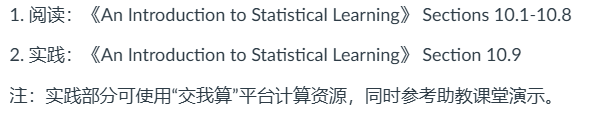

1，加载包

In [ ]:
###加载包 
library(limma)
library(ggplot2)
library(magrittr)
library(ggrepel)
library(impute)

2，读取数据   

In [ ]:
path = "/data1/project/"  # 替换为工作路径
setwd(path)
NA_rate_retain <- 0.25 

In [ ]:
data_all <- read.csv("protein_matrix.txt", sep = "\t", header = T, row.names = 1)
data_all[data_all==0] <- NA # 检查全局的缺失值
dim(data_all)

data_all <- normalizeQuantiles(data_all)###归一化
data_all_log2 <- log2(data_all)###log2转化

[1] 11119   206

In [ ]:
data_t<-data_all[,grep('T',colnames(data_all))]###肿瘤样本
data_n<-data_all[,grep('N',colnames(data_all))]###癌旁样本

In [ ]:
data_t

,iBAQ.LADC_01T,iBAQ.LADC_02T,iBAQ.LADC_03T,iBAQ.LADC_04T,iBAQ.LADC_05T,iBAQ.LADC_06T,iBAQ.LADC_07T,iBAQ.LADC_08T,iBAQ.LADC_09T,iBAQ.LADC_100T,⋯,iBAQ.LADC_90T,iBAQ.LADC_91T,iBAQ.LADC_92T,iBAQ.LADC_93T,iBAQ.LADC_94T,iBAQ.LADC_95T,iBAQ.LADC_96T,iBAQ.LADC_97T,iBAQ.LADC_98T,iBAQ.LADC_99T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H9,2760417.8,52836665.6,1278307.2,NA,NA,10487663.6,NA,130477.6,NA,NA,⋯,20019405,2622555.3,2205876.8,62767402.2,21760600,22793506,28672929,53267386.8,162809056.3,685391737.1
A0A075B6I0,NA,14100404.4,9439787.7,16130027.2,NA,104775207.6,NA,NA,NA,NA,⋯,NA,371284.6,77018264.2,68395737.3,42742357,NA,NA,15145271.1,59173115.0,NA
A0A075B6I1,1601475.0,1412373.4,NA,NA,NA,NA,55505.87,NA,NA,NA,⋯,NA,2586631.2,1187318.3,NA,NA,NA,NA,NA,NA,NA
A0A075B6I4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A0A075B6I9,NA,NA,75290946.0,14691529.3,NA,16044317.7,15115406.86,NA,NA,7822858,⋯,25316947,8136461.3,58657039.2,25403300.4,25510629,NA,NA,NA,129936351.1,35064156.1
A0A075B6J1;A0A0A0MRZ9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2414966.0,NA
A0A075B6J9,4976609.4,11235404.7,NA,NA,21927854,5073750.8,8933649.06,NA,8102220,NA,⋯,NA,NA,7340283.7,16807047.3,NA,NA,NA,NA,31557073.2,1303757.8
A0A075B6K2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,1862594.1,NA,NA,NA,NA,NA,NA
A0A075B6K4,22321057.0,11077215.8,8824984.3,17635223.6,18379776,51886803.2,27453073.64,158615065.2,107147307,NA,⋯,11194687,149755786.4,27293888.3,NA,245825904,45055516,NA,28876008.0,407998417.7,NA


In [ ]:
data_n

,iBAQ.LADC_01N,iBAQ.LADC_02N,iBAQ.LADC_03N,iBAQ.LADC_04N,iBAQ.LADC_05N,iBAQ.LADC_06N,iBAQ.LADC_07N,iBAQ.LADC_08N,iBAQ.LADC_09N,iBAQ.LADC_100N,⋯,iBAQ.LADC_90N,iBAQ.LADC_91N,iBAQ.LADC_92N,iBAQ.LADC_93N,iBAQ.LADC_94N,iBAQ.LADC_95N,iBAQ.LADC_96N,iBAQ.LADC_97N,iBAQ.LADC_98N,iBAQ.LADC_99N
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H9,4046739.0,17097196,NA,663839.4,NA,48718385.2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,16819858,NA
A0A075B6I0,NA,36318961,451299.8,35394050.0,17788352,101295646.0,NA,NA,NA,NA,⋯,25466114,NA,30044403.39,32718838,3913824,4430634.6,NA,67121389.7,64529852,NA
A0A075B6I1,NA,2264780,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A0A075B6I4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,25926614.3,NA,NA,NA
A0A075B6I9,NA,NA,NA,NA,NA,40260215.1,NA,12548497,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,11130679.8,NA,NA
A0A075B6J1;A0A0A0MRZ9,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A0A075B6J9,NA,NA,NA,NA,NA,17999277.4,NA,3320506,6182410,NA,⋯,NA,NA,NA,NA,NA,NA,NA,2475330.5,NA,NA
A0A075B6K2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
A0A075B6K4,17609714.7,1714947,19537697.1,52810537.6,38887835,36427036.6,NA,150339542,118010643,NA,⋯,54472023,NA,13910494.89,772219,20581984,95483638.3,NA,21257344.4,173053065,NA


In [ ]:
###过滤低表达基因（至少在25%样本中表达）
len_t <- function(x){return(ncol(data_t)-sum(is.na(x)))	}
len_n <- function(x){return(ncol(data_n)-sum(is.na(x)))	}

len_data_t<-apply(data_t,1,len_t)
retain_row_t<-which(len_data_t>=ncol(data_t)*NA_rate_retain) 
len_data_n<-apply(data_n,1,len_n)
retain_row_n<-which(len_data_n>=ncol(data_n)*NA_rate_retain) 

retain_row_inter <- intersect(retain_row_t, retain_row_n)

data_t <- data_t[retain_row_inter,]
data_n <- data_n[retain_row_inter,]

In [ ]:
data_t

,iBAQ.LADC_01T,iBAQ.LADC_02T,iBAQ.LADC_03T,iBAQ.LADC_04T,iBAQ.LADC_05T,iBAQ.LADC_06T,iBAQ.LADC_07T,iBAQ.LADC_08T,iBAQ.LADC_09T,iBAQ.LADC_100T,⋯,iBAQ.LADC_90T,iBAQ.LADC_91T,iBAQ.LADC_92T,iBAQ.LADC_93T,iBAQ.LADC_94T,iBAQ.LADC_95T,iBAQ.LADC_96T,iBAQ.LADC_97T,iBAQ.LADC_98T,iBAQ.LADC_99T
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H9,2760417.8,52836665.6,1278307.2,NA,NA,10487663.6,NA,130477.6,NA,NA,⋯,20019405.4,2622555.3,2205876.8,62767402.2,21760600,22793506,28672928.9,53267386.8,162809056,685391737.1
A0A075B6I0,NA,14100404.4,9439787.7,16130027.2,NA,104775207.6,NA,NA,NA,NA,⋯,NA,371284.6,77018264.2,68395737.3,42742357,NA,NA,15145271.1,59173115,NA
A0A075B6K4,22321057.0,11077215.8,8824984.3,17635223.6,18379776.4,51886803.2,27453073.64,158615065.2,107147307,NA,⋯,11194686.7,149755786.4,27293888.3,NA,245825904,45055516,NA,28876008.0,407998418,NA
A0A075B6K5,35029653.0,66159072.1,17354009.7,15881918.6,11839746.0,22877394.6,21406642.95,36897264.5,43820264,2822708.4,⋯,12430364.6,62357371.2,43445359.8,32667718.2,36353320,8676076,27603851.0,9980019.9,26972313,10882673.1
A0A075B6S2;A0A0A0MRZ7,NA,NA,NA,NA,94992241.0,38080429.8,90630974.09,NA,121115942,14618078.5,⋯,39829226.1,123066339.2,73692032.2,22273935.7,NA,43564129,NA,4797438.8,NA,45409425.2
A0A075B6S5,7109383.7,12255136.5,1869308.8,11055408.2,2988938.3,24646056.9,12005800.79,15713687.6,11492930,3035605.7,⋯,16864012.2,26856300.5,86952768.8,11360081.5,17075427,2099975,2497421.1,4011565.4,3111011,1613151.9
A0A087WSY6,7647898.3,8821295.0,NA,NA,NA,NA,6092235.95,4215333.2,NA,3902425.6,⋯,5760253.9,NA,776287.4,12400116.7,NA,7051846,17518030.0,3361015.9,32425675,NA
A0A087WW87;P01614,226267459.7,382279182.7,148785129.3,76013747.6,148068932.8,143224015.0,268103297.37,25703401.0,328832812,45437461.2,⋯,179008067.8,214065786.6,171121803.0,83710743.9,79021914,304233597,10178071.0,323333762.4,59092040,32305857.7
A0A0A0MS15,16402066.4,20447955.7,6170242.9,NA,2680161.3,9372055.2,3328114.58,18032178.0,17004973,7084389.1,⋯,NA,22097913.1,74128670.5,15894679.0,29298852,4807634,25934124.0,5521346.7,67099706,458157.9


In [ ]:
data_n

,iBAQ.LADC_01N,iBAQ.LADC_02N,iBAQ.LADC_03N,iBAQ.LADC_04N,iBAQ.LADC_05N,iBAQ.LADC_06N,iBAQ.LADC_07N,iBAQ.LADC_08N,iBAQ.LADC_09N,iBAQ.LADC_100N,⋯,iBAQ.LADC_90N,iBAQ.LADC_91N,iBAQ.LADC_92N,iBAQ.LADC_93N,iBAQ.LADC_94N,iBAQ.LADC_95N,iBAQ.LADC_96N,iBAQ.LADC_97N,iBAQ.LADC_98N,iBAQ.LADC_99N
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H9,4046739.0,17097196.2,NA,663839.4,NA,48718385.2,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,16819857.6,NA
A0A075B6I0,NA,36318960.9,451299.8,35394050.0,17788352,101295646.0,NA,NA,NA,NA,⋯,25466113.7,NA,30044403.4,32718837.7,3913824,4430634.6,NA,67121389.7,64529851.8,NA
A0A075B6K4,17609714.7,1714946.9,19537697.1,52810537.6,38887835,36427036.6,NA,150339541.9,118010643,NA,⋯,54472022.5,NA,13910494.9,772219.0,20581984,95483638.3,NA,21257344.4,173053065.0,NA
A0A075B6K5,11924766.1,14471248.8,13923371.0,45098322.5,14991583,69639420.6,12351528,36023009.3,45774802,2911921,⋯,2603869.7,4252246.7,NA,11500511.6,10886231,2764623.0,17142398.7,22451229.5,11807728.4,NA
A0A075B6S2;A0A0A0MRZ7,NA,NA,NA,NA,14502131,47189191.6,109966479,NA,NA,21472619,⋯,NA,NA,48076477.7,NA,NA,6191947.1,27775140.7,NA,NA,20179708
A0A075B6S5,4407089.1,6925797.1,NA,19379123.3,NA,NA,13549753,36178216.2,6468924,3748910,⋯,18627683.3,NA,31560517.2,10128482.7,5067955,525988.7,5334045.3,1484053.2,1517386.7,2400315
A0A087WSY6,NA,NA,NA,NA,NA,9339615.5,NA,NA,NA,2762840,⋯,NA,NA,NA,NA,5231876,NA,NA,9076562.7,NA,NA
A0A087WW87;P01614,129894864.1,130068345.9,34808234.7,153815696.2,84534933,153129605.5,147465829,58828974.9,362455522,40401847,⋯,56326930.3,55706836.7,142612363.8,2997703.6,115982124,236418192.9,16482020.4,154791266.7,18659535.3,17982166
A0A0A0MS15,5125213.0,6209766.3,3813043.3,10912531.0,3335774,8946886.3,2737358,10831853.6,12476116,3847101,⋯,6715965.1,223625.2,11019801.1,5875430.6,22737340,750631.4,22290666.5,6602345.0,4506214.3,NA


如果不调整阈值，比如说是25%左右的的阈值，最后的差异分析会怎么样

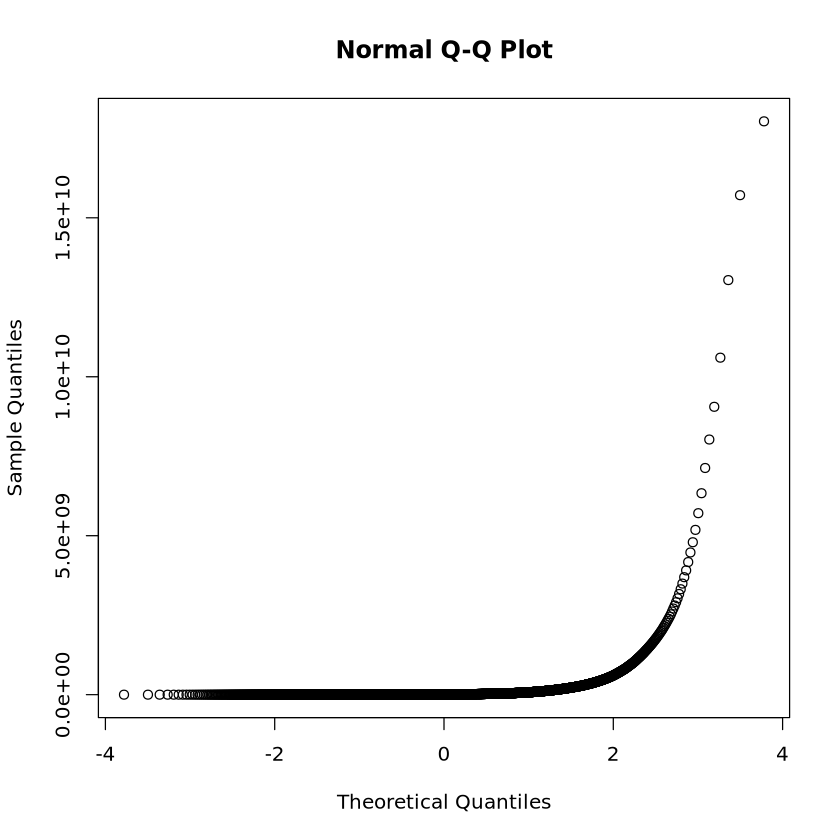


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(unique(data_t$iBAQ.LADC_01T))
D = 0.43277, p-value < 2.2e-16
alternative hypothesis: two-sided



	Asymptotic one-sample Kolmogorov-Smirnov test

data:  scale(unique(log2(data_t$iBAQ.LADC_01T)))
D = 0.016339, p-value = 0.06975
alternative hypothesis: two-sided


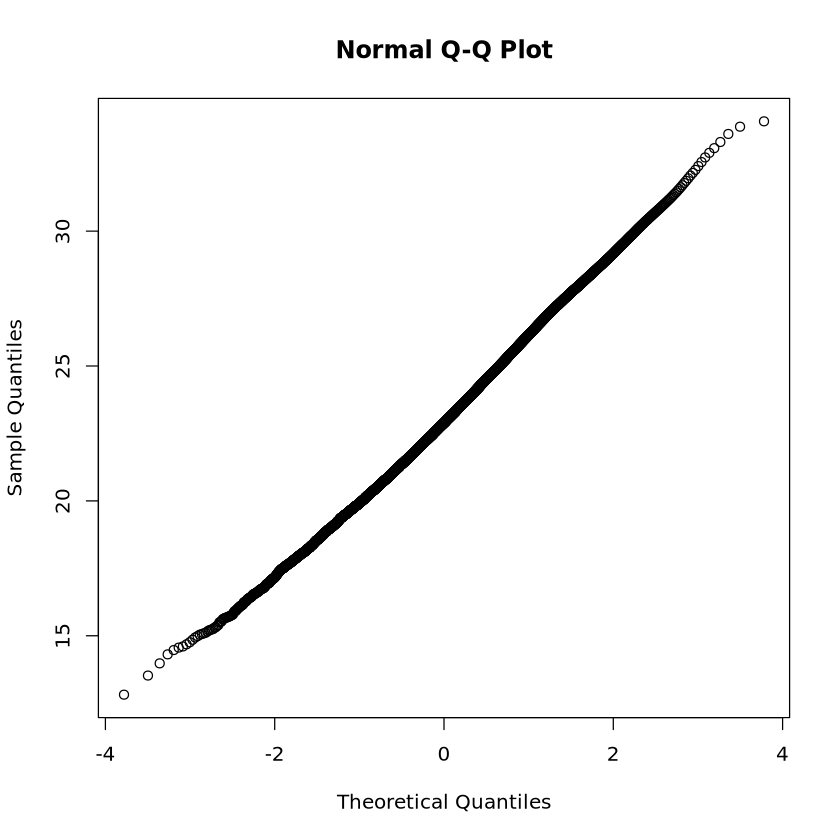

In [ ]:
###正态性检验

#QQ-plot
qqnorm(data_t$iBAQ.LADC_01T)
qqnorm(log2(data_t$iBAQ.LADC_01T))

#ks-test

ks.test(scale(unique(data_t$iBAQ.LADC_01T)), "pnorm")
ks.test(scale(unique(log2(data_t$iBAQ.LADC_01T))), "pnorm")

In [ ]:
###Wilcoxon Signed Rank Test
p.raw <- c()
for(i in 1:dim(data_t)[1]){
  p <- wilcox.test(unlist(data_t[i, ]), unlist(data_n[i, ]), paired = T)$p.value
  p.raw <- append(p.raw, p)
  }
p.adj <- p.adjust(p.raw, method = "BH")

fc <- c()
for(i in 1:dim(data_t)[1]){
  fc <- append(fc, mean(unlist(data_t[i, ])/unlist(data_n[i, ]), na.rm = T))
}

table <- data.frame(protein = unlist(lapply(rownames(data_t), 
                                            function(x) return(unlist(strsplit(x, ";"))[1])))
                    , p.adj = p.adj, fc = fc)
change <- c()
for(i in 1:dim(table)[1]){
  if(table$p.adj[i]<0.05 & table$fc[i]>2){
    change <- append(change, "Up")
  }
  else if(table$p.adj[i]<0.05 & table$fc[i]<0.5){
    change <- append(change, "Down")
  }
  else{
    change <- append(change, "Not significant")
  }
}

table$change <- change
write.csv(table, "up_down.csv", quote = F)

Warning message in wilcox.test.default(unlist(data_t[i, ]), unlist(data_n[i, ]), :
“cannot compute exact p-value with zeroes”


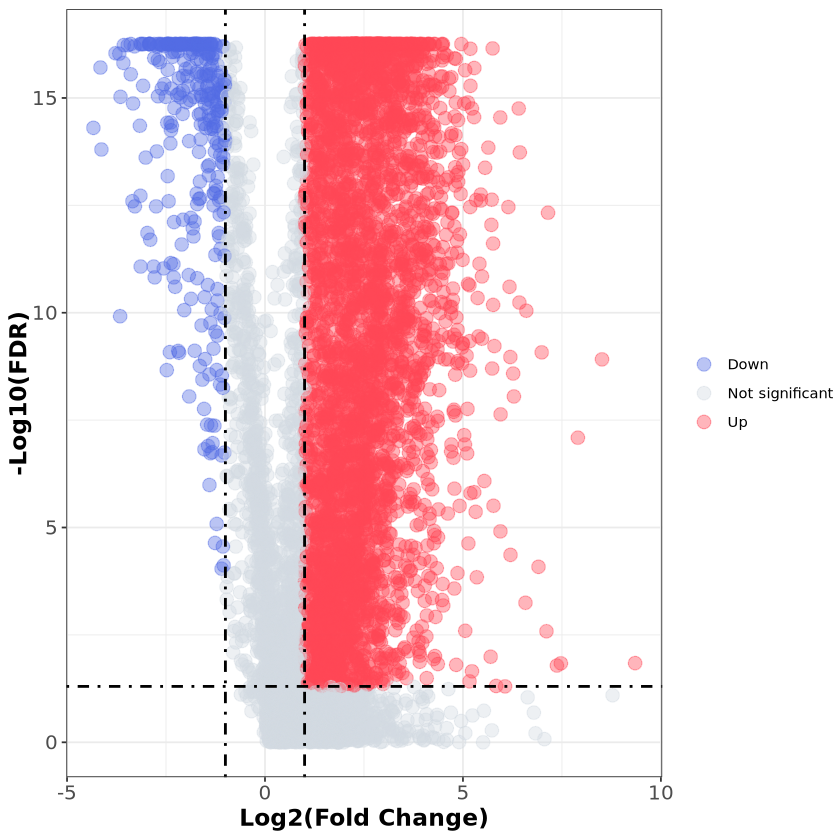

In [ ]:
ggplot(	# 设置数据
  table, aes(x = log2(fc), y = -log10(p.adj), colour=change)) +
  geom_point(alpha=0.4, size=3.5) +
  scale_color_manual(values=c("#546de5", "#d2dae2","#ff4757")) +
  # 辅助线
  geom_vline(xintercept=c(-1,1),lty=4,col="black",lwd=0.8) +
  geom_hline(yintercept = -log10(0.05),lty=4,col="black",lwd=0.8) +
  # 坐标轴
  labs(x="Log2(Fold Change)", y="-Log10(FDR)")+
  theme_bw()+
  # 横纵坐标
  theme(axis.text = element_text(size=12), axis.title = element_text(size=14, face="bold")) +
  # 图例
  theme(plot.title = element_text(hjust = 0.5),legend.position="right",legend.title = element_blank()
)


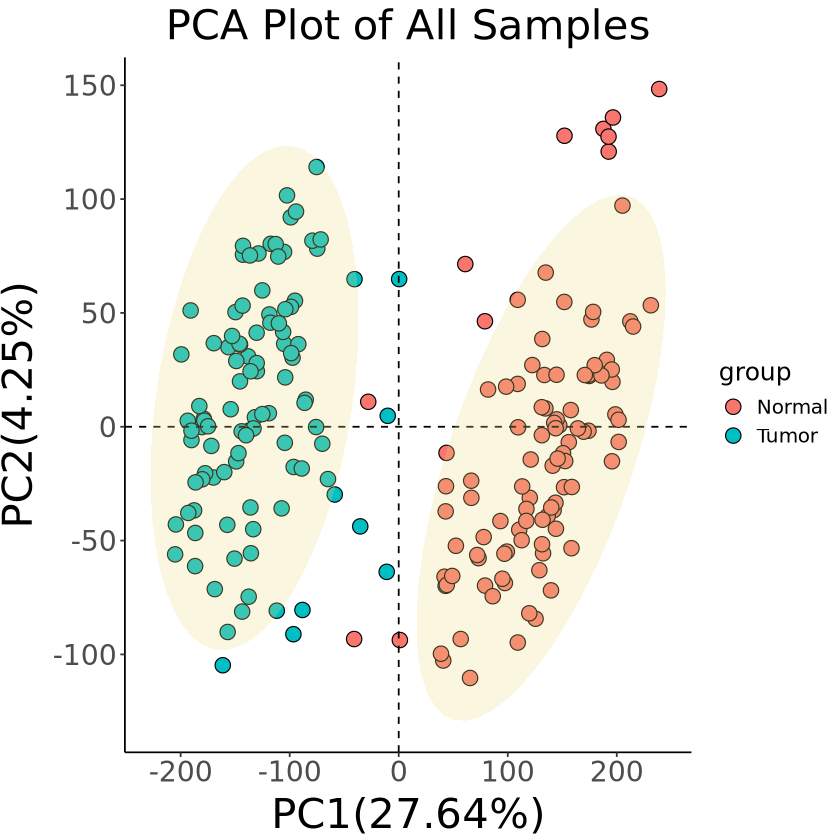

In [ ]:

###pca analysis
min_exp <- min(data_all, na.rm = T)
len <- function(x){return(ncol(data_all)-sum(is.na(x)))	}
len_data<-apply(data_all,1,len)
retain_row<-which(len_data>=ncol(data_all)*NA_rate_retain) 
data_all_filter <- data_all[retain_row,]
data_all_filter[is.na(data_all_filter)] <- min_exp
data_pca <- log2(data_all_filter)
pca = prcomp(t((data_pca)))
pca.res = pca[["x"]] %>%
  as.data.frame()
pca.res$group <- c(rep("Tumor", 103), rep("Normal", 103))
pca.var = pca$sdev^2 %>%
  as.data.frame()
pca.var$var = round(pca.var$. / sum(pca.var) * 100, 2) # 计算各主成分所占百分比
ggplot(pca.res, aes(PC1, PC2))+ 
  geom_point(size = 4, shape = 21, aes(fill = group))+
  geom_hline(yintercept = 0,linetype="dashed") + 
  geom_vline(xintercept = 0,linetype="dashed") + 
  stat_ellipse(level = 0.95, aes(group = group), 
               geom = "polygon", fill = "Light Goldenrod 2", alpha = 0.25)+ # 添加置信椭圆
  labs(x = paste('PC1(', pca.var$var[1],'%)', sep = ''), 
       y = paste('PC2(', pca.var$var[2],'%)', sep = '')) +
  theme_classic() + labs(title = "PCA Plot of All Samples") +
  theme(axis.title.x = element_text(size = 25, vjust = 0.3), 
        axis.title.y = element_text(size = 25, vjust = 1.8)) +
  theme(axis.text.x = element_text(size = 17), 
        axis.text.y = element_text(size = 17)) +
  theme(plot.title = element_text(hjust = 0.5, size = 25), 
        legend.title = element_text(size = 15), legend.text = element_text(size = 12))